## Ambiente 🌎

El ambiente de Gridworld se define como una cuadricula de `nxm`. El ambiente tiene obstáculos, es decir casillas por las cuales no puede pasar el agente. Al chocar con un obstáculo, el agente termina en la misma casilla en la que estaba. Un comportamiento similar se observa cuando el agente trata de salir de los bordes del ambiente. Además, el ambiente tiene una casilla de inicio definida, y algunas casillas de salida (determinadas por la recompensa asociada a ellas). Un ejemplo del ambiente para el caso `3x4` se muestra a continuación.

![gridworld.png](https://raw.githubusercontent.com/lfsalasnu/IA_explorador/refs/heads/main/gridworld.png)

En este ejemplo del ambiente la casilla de inicio es la casilla inferior izquierda y tiene como objetivo llegar a la casilla de salida con recompensa 1. La otra casilla de salida tiene recompensa -1.


#### ¿Cómo podemos codificar el ambiente?

La definición del ambiente de Gridworld esta definida por:
1. Una cuadrícula rectangular (`grid`), con dimensiones `(n,m)` dadas por parámetro, donde la casilla superior izquierda esta en la posición (0,0). Definiremos las casillas por las que puede pasar el agente como espacios en blanco y las casillas por las que no puede pasar el agente con un `'#'`.
2. Las recompensas de cada casilla de la cuadrícula estan definidas dentro de la definición de `grid`.
    - +1 para la casilla objetivo
    - -1 para las casillas de trampa
3. Un atributo con el estado actual (`state`) en el que se encuentra el agente. Por defecto este estado será la posición marcada como `S`.

Un ejemplo de una cuadrícula de 3x4, como se mostró anteriormente, sería así:

 ```python  
    board = [[' ', ' ', ' ',  +1],
            [' ', '#', ' ',  -1],
             ['S', ' ', ' ', ' ']]
```

La definición del ambiente un ejemplo de recompensas se vería así:

```python
    def __init__(self, board):
        # layout
        self.grid = copy_elements_from_the_board
```


#### 1. Estructura del ambiente

Defina la clase `Gridworld`, que recibe una cuadrícula con la descripción del tablero `board`, definidos como en el ejemplo. La información codificada en la cuadrícula será almacenada en el atributo `grid` del ambiente (este atributo corresponde al mdp donde se almacena la información del ambiente, la función de transición y las recompensas). Adicionalmente, para facilitar el uso del mdp, definimos los atributos para guardar la información de la cuadrícula; las filas (`nrows`) y columnas (`ncols`). esta información se da por parámetro (`dimensions`), al instanciar la clase, como una tupla con los valores respectivos. Adicionalmente la clase debe tener los atributos `initial_state` y `state` que corresponden al estado inicial y el estado actual del agente en el ambiente, respectivamente. Estos atributos se guardan como tuplas.

Finalmente, el atributo `grid` se debe codificar de tal forma que las casillas prohibidas (marcadas como `'#'`) no deben tener ningún valor asignado (su valor debe ser `None`), las casillas en blanco deben tener valor `0`, y las casillas con recompensas asociadas deben tener el valor de la recompensa como su valor. Note que con esta codificación de `grid`, y teniendo en cuenta que las acciones son determinísticas, estamos codificando directamente las recompensas del ambiente. Si este no fuera el caso, sería necesario definir un nuevo atributo `rewards`.

In [37]:
#Definición del ambiente de gridworld

#Librerias de gráficas
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Definición de la clase principal
class Gridworld:
    def __init__(self, board, dimensions):
        # your code here
        self.nrows = dimensions[0]
        self.ncols = dimensions[1]
        tablero=[]
        for i in range(self.nrows):
          fila=[]
          for j in range(self.ncols):
            if board[i][j]==' ':
              fila.append(0)
            elif board[i][j]=='#':
              fila.append(None)
            elif board[i][j]=='+1':
              fila.append(1)
            elif board[i][j]=='S':
              self.initial_state = (i,j)
              fila.append(0)
            else:
              fila.append(-1)
          tablero.append(fila)
        self.grid = tablero.copy()
        self.state = self.initial_state

    def get_current_state(self):
        # your code here
        #raise NotImplementedError
        return self.state

    def get_possible_actions(self, state):
        # your code here
        if self.grid[state[0]][state[1]] == 0:
          return ['up', 'right', 'down', 'left']
        elif self.grid[state[0]][state[1]] == None:
          return []
        elif self.grid[state[0]][state[1]] == 1 or self.grid[state[0]][state[1]] == -1:
          return ['exit']
        #raise NotImplementedError

    def do_action(self, action):
        # your code here
        # el estado esta en el atributo self.state
        x,y=self.state
        if action == 'left' and y > 0 and self.grid[x][y-1]!=None:
          y=y-1
        elif action == 'down' and x < self.ncols-1:
          if self.grid[x+1][y]!=None:
            x=x+1
        elif action == 'right' and y < self.nrows and self.grid[x][y+1]!=None:
          y=y+1
        elif action == 'up' and x > 0 and self.grid[x-1][y]:
          x=x-1
        self.state = (x,y)
        return self.grid[x][y], self.state

        #raise NotImplementedError

    def reset(self):
        self.state = self.initial_state
        # your code here
        #raise NotImplementedError

    def is_terminal(self):
        # your code here
        if self.grid[self.state[0]][self.state[1]] == 1 or self.grid[self.state[0]][self.state[1]] == -1:
          return True
        else:
          return False
        #raise NotImplementedError

    #Funciones auxiliares
    def get_action_index(self, action):
        actions = ['up', 'right', 'down', 'left']
        index = 0
        for a in actions:
            if action == a:
                return index
            index += 1

    def plot(self):
        fig1 = plt.figure(figsize=(3, 3))
        ax1 = fig1.add_subplot(111, aspect='equal')

        # Lineas
        for i in range(0, len(self.grid)+1):
            ax1.axhline(i , linewidth=2, color="#2D2D33")
            ax1.axvline(i , linewidth=2, color="#2D2D33")

        # Amarillo - estado inicial
        (i,j)  = self.initial_state
        ax1.add_patch(patches.Rectangle((j, self.nrows - i -1), 1, 1, facecolor = "#F6D924"))
        for j in range(len(self.grid[0])):
            for i in range(len(self.grid)):
                if self.grid[i][j] == 1: # verde
                    ax1.add_patch(patches.Rectangle((j,self.nrows - i -1), 1, 1, facecolor = "#68FF33"))
                if self.grid[i][j] == None: # gris
                    ax1.add_patch(patches.Rectangle((j,self.nrows - i -1), 1, 1, facecolor = "#6c7780"))
                if self.grid[i][j] == -1: # rojo
                    ax1.add_patch(patches.Rectangle((j,self.nrows - i -1), 1, 1, facecolor = "#cc0000"))
        plt.scatter(self.state[1] + 0.5, self.nrows - self.state[0] - 1 +0.5, s = 100, color = "black", marker = "o", facecolor = "blue", edgecolors = "blue", zorder = 10)
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i][j] == None:
                    ax1.text(self.ncols-j-1, self.nrows-i-1, "", ha='center', va='center')
                else:
                    ax1.text(j+0.5, self.nrows-i-1+0.5, self.grid[i][j], ha='center', va='center')
        plt.axis("off")
        plt.show()


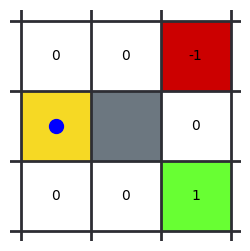

In [13]:
#Pruebas estructura del ambiente
### BEGIN TESTS
board = [[' ', ' ', '-1'],
      ['S', '#', ' '],
      [' ', ' ', '+1']]

#board = [[' ', ' ', ' ', ' ', '-1'],
#      ['S', '#', ' ', ' ', ' '],
#      [' ', '#', ' ', ' ', ' '],
#      [' ', '#', ' ', ' ', ' '],
#      [' ', ' ', '+1',' ', ' ']]
# grid
grid = [[0, 0    ,-1],
        ['S',None, 0],
        [ 0,   0,  1]]

grid = Gridworld(board, (3,3))

try:
    grid.nrows
except:
    print("El atributo nrows no está definido")
try:
    grid.ncols
except:
    print("El atributo ncols no está definido")
try:
    grid.initial_state
except:
    print("El atributo initial_state no está definido")

try:
    grid.state
except:
    print("El atributo state no está definido")

try:
    grid.grid
except:
    print("El atributo grid no está definido")

### END TESTS

grid.plot()

#### 2. Movimientos del agente

Defina la función `do_action` que ejecuta la acción tomada por el agente dentro de la cuadrícula. Esta función recibe como parámetro la acción a ejecutar y retorna el valor de la casilla de llegada de la acción y el estado de llegada de la acción (como una tupla). Note que los movimientos fuera del tablero o las casillas prohibidas no deberían tener ningún efecto en la posición del agente (el agente se debe mantener en la misma posición de partida).

En esta versión de gridworld vamos a trabajar con acciones determinísticas, es decir el movimiento deseado del agente (`up`,`right`,`down`,`left`) siempre resultara en el estado esperado.


#### 3. Estado actual

Defina la función `get_current_state` que retorna el estado actual del agente (la casilla donde se encuentra el agente). Esta función no recibe ningún parámetro y retorna el estado actual como una tupla.

#### 4. Obtener las acciones

Defina la función `get_possible_actions` que recibe el estado actual del agente por parámetro y retorna una lista de las acciones válidas para el estado dado.

Tenga en cuenta que en esta versión de Gridworld, todas las acciones (i.e., los movimientos en las cuatro direcciones) son posibles para el agente en cada una de las casillas regulares de la cuadrícula. Las casillas de salida tienen única acción posible `'exit'` y las casillas prohibidas no tienen ningúna acción asociada (una lista vacía de acciones).


#### 5. Reinicializar el ambiente

Defina la función `reset` que no recibe parámetros ni retorna ningún valor. El efecto de esta función es restablecer el ambiente a su estado inicial.




#### 6. Estados terminales

Defina la función `is_terminal` que determina si el agente está en un estado final o no. En nuestro caso los estados finales o los estados de salida estarán determinados por las casillas con recompensa 1 o -1.
Esta función no recibe parámetros y retorna un booleano determinando si el agente está en un estado final o no.

## Agente Reflexivo

- Defina por medio de un `while` un agente reflexivo.
- Cuente la cantidad de pasos para llegar al estado terminal.
- Ejecute 50 episodios del ambiente con el agente reflexivo, calcule la cantidad de veces que se gana el juego del laberinto y calcule el promedio de pasos para ganar.





In [44]:
import random
board = [[' ', ' ', '-1'],
      ['S', '#', ' '],
      [' ', ' ', '+1']]

laberinto = Gridworld(board, (3,3))
# Defina por medio de un while un agente reflexivo.
hist = []
for i in range(50):
  laberinto.reset()
  # Cuente la cantidad de pasos para llegar al estado terminal.
  pasos = 0
  while True:
      #laberinto.plot()
      x,y=laberinto.get_current_state()
      #print(x,y)
      if x!=laberinto.nrows-1:
        if laberinto.grid[x+1][y]==1:
          laberinto.do_action('down')
          pasos+=1
      if x!=0:
        if laberinto.grid[x-1][y]==1:
          laberinto.do_action('up')
          pasos+=1
      if y!=laberinto.ncols-1:
        if laberinto.grid[x][y+1]==1:
          laberinto.do_action('right')
          pasos+=1
      if y!=0:
        if laberinto.grid[x][y-1]==1:
          laberinto.do_action('left')
          pasos+=1
      else:
        opc = random.choice(['up', 'right', 'down', 'left'])
        laberinto.do_action(opc)
        pasos+=1
      if laberinto.is_terminal():
        #laberinto.plot()
        break
      #if laberinto.grid[x][y] == 1 or laberinto.grid[x][y] == -1:
      #  break
      #laberinto.do_action('up')
  hist.append(pasos)
print(hist)
print(sum(hist)/len(hist))
  #print('La cantidad de pasos es:',pasos)

[12, 16, 11, 13, 16, 5, 6, 4, 4, 6, 5, 4, 5, 9, 6, 10, 8, 12, 11, 9, 10, 7, 9, 9, 10, 5, 5, 5, 11, 14, 15, 13, 14, 10, 6, 11, 13, 13, 4, 3, 19, 13, 8, 15, 20, 19, 3, 14, 14, 18]
10.04
